             0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3      NaN 

C:\Users\Owner\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([354])) that is different to the input size (torch.Size([354, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:0 and loss:621.2716674804688
Epoch:10 and loss:610.4188842773438
Epoch:20 and loss:599.3526611328125
Epoch:30 and loss:587.2113647460938
Epoch:40 and loss:573.0980224609375
Epoch:50 and loss:556.3480834960938
Epoch:60 and loss:536.80029296875
Epoch:70 and loss:514.780517578125
Epoch:80 and loss:491.00164794921875
Epoch:90 and loss:466.3210754394531
Epoch:100 and loss:441.5047607421875
Epoch:110 and loss:417.2197265625
Epoch:120 and loss:394.0154724121094
Epoch:130 and loss:372.2815856933594
Epoch:140 and loss:352.1948547363281
Epoch:150 and loss:333.80816650390625
Epoch:160 and loss:317.0432434082031
Epoch:170 and loss:301.77496337890625
Epoch:180 and loss:287.858642578125
Epoch:190 and loss:275.1387023925781
Training RMSE: 16.231348037719727
Testing RMSE: 14.515864372253418


C:\Users\Owner\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([152])) that is different to the input size (torch.Size([152, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


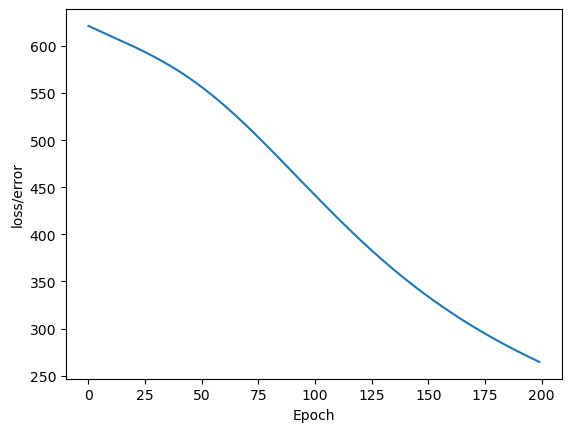

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(raw_df)


scaler = StandardScaler()
data = scaler.fit_transform(data)


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

# Define the model architecture
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(13, 16)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(16, 32)  # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(32, 1)   # Second hidden layer to output layer
    def forward(self, x):
        x = F.relu(self.fc1(x))  # ReLU activation for first hidden layer
        x = F.tanh(self.fc2(x))  # tanh activation for second hidden layer
        x = self.fc3(x)              # Output layer (no activation for regression)
        return x
model=NeuralNet()
criterion=nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs=200
losses=[]
for i in range(epochs):
    y_pred=model.forward(X_train)
    loss=criterion(y_pred,y_train)
    losses.append(loss.detach().numpy())
    if i%10==0:
        print(f'Epoch:{i} and loss:{loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')
with torch.no_grad():
    model.eval()
    train_predictions = model(X_train)
    test_predictions = model(X_test)
    train_rmse = torch.sqrt(criterion(train_predictions, y_train)).item()
    test_rmse = torch.sqrt(criterion(test_predictions, y_test)).item()

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')







